# LDDMM: how to visualize registration results?

First, run [LDDMM: how to register a mesh to a template?](./lddmm_register_mesh_template.ipynb).

In [1]:
from pathlib import Path

import numpy as np
import pyvista as pv

import polpo.lddmm as plddmm
import polpo.utils as putils
from polpo.plot.pyvista import RegisteredMeshesGifPlotter
from polpo.preprocessing import Map, Sorter
from polpo.preprocessing.mesh.io import PvReader
from polpo.preprocessing.path import FileFinder, IsFileType, PathShortener

No CUDA runtime is found, using CUDA_HOME='/usr'


In [2]:
STATIC_VIZ = True

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

In [3]:
STRUCT_NAME = "PostHipp"

OUTPUTS_DIR = Path("results") / f"registration_{STRUCT_NAME.lower()}"
REGISTRATION_DIR = OUTPUTS_DIR / "registration"

In [4]:
_custom_order = putils.custom_order(["source", "target"])
name2shortname = PathShortener(init_index=-1) + (
    lambda x: x.split(".")[0].split("_")[1]
)

filenames = (
    FileFinder(
        OUTPUTS_DIR,
        rules=IsFileType("vtk"),
    )
    + Sorter(lambda x: _custom_order(name2shortname(x)))
)()

pv_reader = Map(PvReader())

source, target = pv_reader(filenames)

## Template and control points

In [5]:
cp, momenta = plddmm.io.load_cp_and_momenta(REGISTRATION_DIR)

template = plddmm.io.load_template(REGISTRATION_DIR, as_pv=True)

Confirm that source and template are the same mesh.

In [6]:
np.amax(np.abs(template.points - source.points))

0.0

Visualize template with control points.

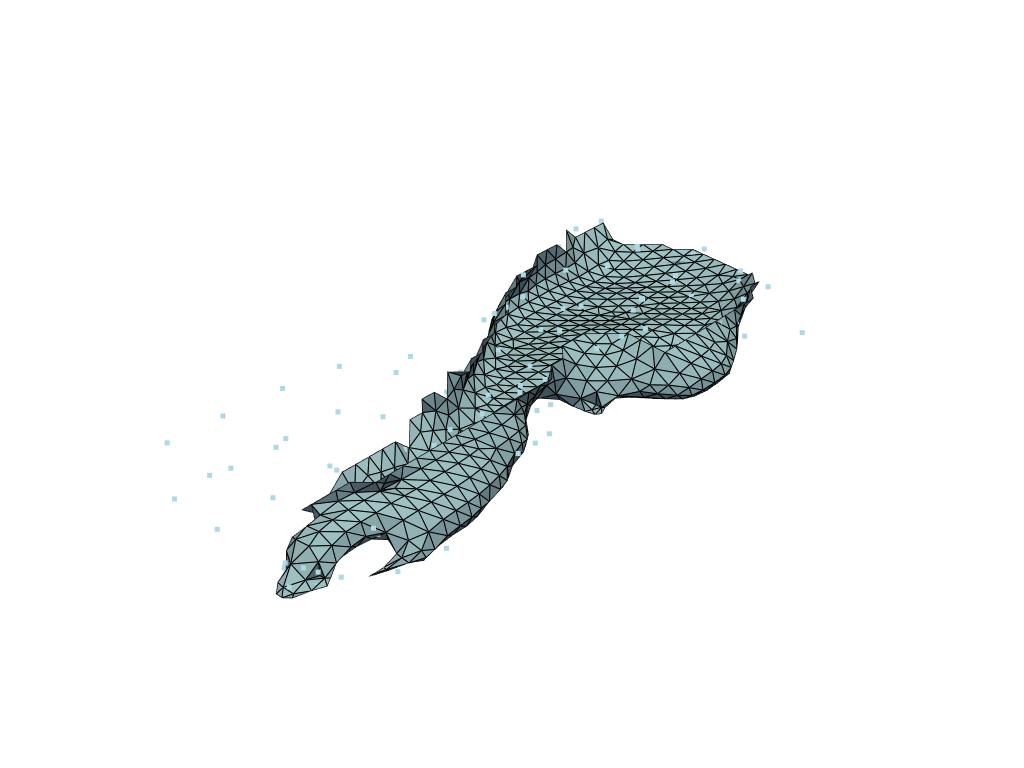

In [7]:
pl = pv.Plotter()

pl.add_mesh(template, show_edges=True)

# TODO: add velocity and allow for filtering
# control_points.set_active_scalars("Velocity")
pl.add_points(pv.PolyData(cp))

pl.show()

## Target and reconstructed meshes

In [8]:
reconstructed = plddmm.io.load_deterministic_atlas_reconstruction(
    REGISTRATION_DIR, as_pv=True
)

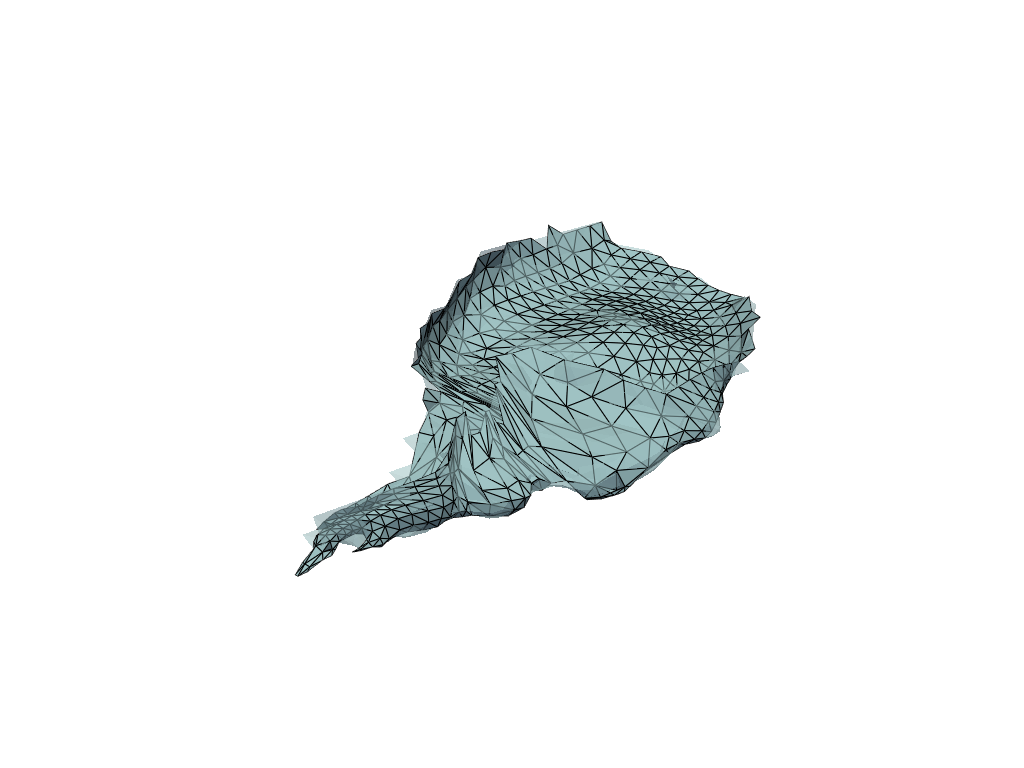

In [9]:
pl = pv.Plotter()

pl.add_mesh(reconstructed, show_edges=True)
pl.add_mesh(target, opacity=0.55)

pl.show()

## Flow

In [10]:
flow_meshes = plddmm.io.load_deterministic_atlas_flow(
    REGISTRATION_DIR,
    as_pv=True,
)

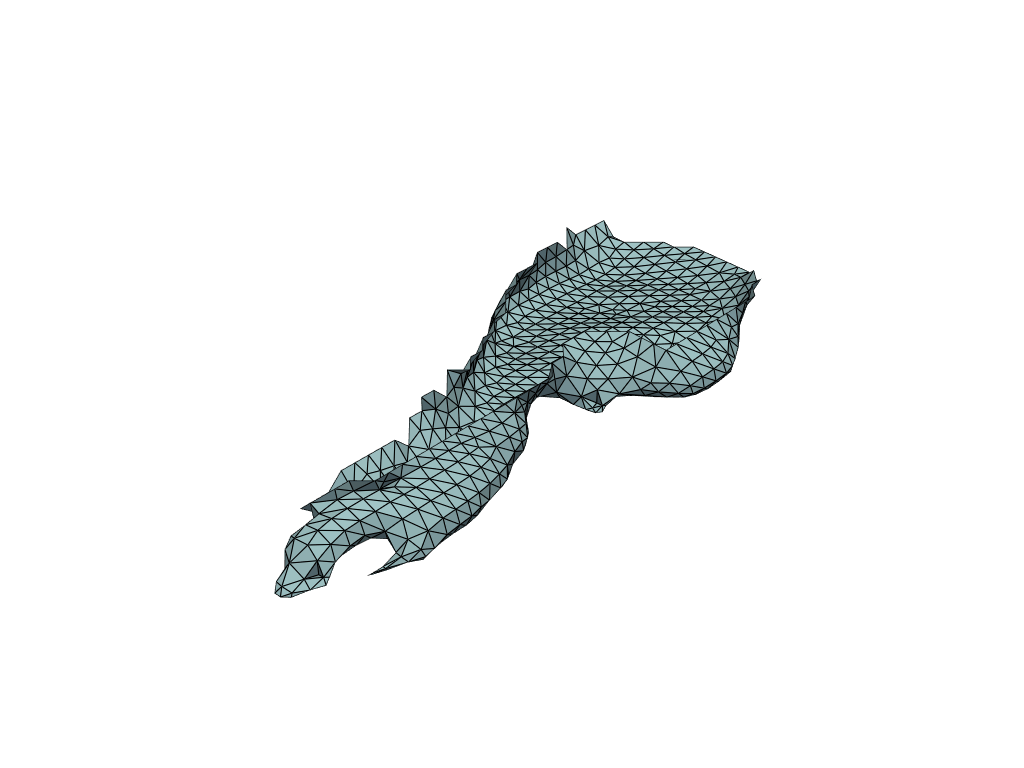

In [11]:
gif_dir = OUTPUTS_DIR / "_images"
gif_dir.mkdir(exist_ok=True)

gif_name = gif_dir / "flow.gif"


pl = RegisteredMeshesGifPlotter(
    gif_name=gif_name.as_posix(),
)

pl.add_meshes(flow_meshes)
pl.close()

pl.show()